# TODOs

- [ ] Verschiedene Modelle trainiert
- [ ] Verschiedene Modelle visualisiert
- [ ] Verschiedene Modelle quantitativ gegenübergestellt (Training- und Testfehler)
- [ ] Ein Modell durch Hyperparametersuche verbessern/verschlechtern
- [ ] Benefit durch Feature-Engineering zeigen
- [ ] Pipeline erstellen, die alles zusammen macht (Daten teilen, Modelle inklusive Hyperparameter aufstellen, alle trainieren, evaluieren und das beste Modell wählen)
- [ ] Am Ende Mini-Wettbewerb. Wer trainiert das beste Modell?

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
if '_ORIGINAL_PRINTOPTIONS' not in globals():
    import builtins
    _ORIGINAL_PRINTOPTIONS = np.get_printoptions()
    np.set_printoptions(threshold=10, edgeitems=2, linewidth=80, suppress=True)
    def print(*args, **kwargs):
        with np.printoptions(**_ORIGINAL_PRINTOPTIONS):
            return builtins.print(*args, **kwargs)

# Example 1

## 📊 Dataset

In [3]:
# Generate an artificial dataset
X, y = make_moons(
    n_samples=100,
    noise=0.1,
    random_state=42
)
X, y

(array([[ 1.58202308, -0.44581483],
        [ 0.0660451 ,  0.4392075 ],
        ...,
        [ 1.88739713, -0.01323424],
        [-0.03479039,  0.45164997]], shape=(100, 2)),
 array([1, 1, ..., 1, 1], shape=(100,)))

In [4]:
print(y)

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1
 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0
 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1]


In [5]:
pd.DataFrame(
    {
        "Feature 1": X[:, 0],  # alle Zeilen der ersten Spalte
        "Feature 2": X[:, 1],  # alle Zeilen der zweiten Spalte
        "Label": y
    }
)

,Feature 1,Feature 2,Label
0,1.582023,-0.445815,1
1,0.066045,0.439207,1
2,0.736631,-0.398963,1
3,-1.056928,0.242456,0
4,-0.802162,0.202718,0
...,...,...,...
95,0.187867,-0.146732,1
96,0.936777,-0.518322,1
97,0.550221,0.724004,0
98,1.887397,-0.013234,1


### Split: Train vs. Test

In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test

(array([[-0.33031615,  0.9271263 ],
        [ 0.08486919,  1.08681791],
        ...,
        [ 1.66753652, -0.18840855],
        [ 1.08160772,  0.20640071]], shape=(70, 2)),
 array([[-0.21884785,  0.81507777],
        [-0.67983069,  0.69539912],
        ...,
        [ 0.92202981, -0.08438964],
        [ 0.18929423, -0.18514051]], shape=(30, 2)),
 array([0, 0, ..., 1, 0], shape=(70,)),
 array([0, 0, ..., 0, 1], shape=(30,)))

### Show Plot

In [7]:
def plot_2d_data(X, y, X_test=None, y_test=None, *, model=None, title="Model Decision Boundaries"):
    """
    Plot the decision boundaries of a classifier along with the dataset points.

    Parameters:
    - X: The feature set (training data) of shape (N_samples, 2)
    - y: The target labels for the training data (binary class labels)
    - model: A trained classifier model
    - X_test: (optional) The feature set for the test samples (same shape as X)
    - y_test: (optional) The target labels for the test data
    - title: Title of the plot
    """
    if model is not None:
        # Create a plot with decision boundaries using DecisionBoundaryDisplay
        X_ = np.concat((X, X_test)) if X_test is not None else X
        DecisionBoundaryDisplay.from_estimator(
            model, X_, response_method="predict", cmap=ListedColormap(["#FFAAAA", "#AAAAFF"]), alpha=0.6, eps=0.5
        )
    else:
        plt.figure()

    # Plot the training points
    neg_idx = y==0
    X_neg, X_pos = X[neg_idx], X[~neg_idx]
    plt.scatter(X_neg[:, 0], X_neg[:, 1], c="#FF6347", marker="o", edgecolors="k", label="Train samples (class 0)", s=100)
    plt.scatter(X_pos[:, 0], X_pos[:, 1], c="#4682B4", marker="o", edgecolors="k", label="Train samples (class 1)", s=100)

    # Plot test data if provided with different symbol
    if X_test is not None and y_test is not None:
        neg_idx = y_test==0
        X_neg, X_pos = X_test[neg_idx], X_test[~neg_idx]
        plt.scatter(X_neg[:, 0], X_neg[:, 1], c="#FF6347", marker="x", label="Test samples (class 0)", s=150, linewidths=2)
        plt.scatter(X_pos[:, 0], X_pos[:, 1], c="#4682B4", marker="x", label="Test samples (class 1)", s=150, linewidths=2)

    plt.title(title, fontsize=14)
    plt.xlabel("Feature 1", fontsize=12)
    plt.ylabel("Feature 2", fontsize=12)
    plt.legend(loc="upper right", bbox_to_anchor=(1.45, 1.025))
    plt.grid(True)
    plt.show()

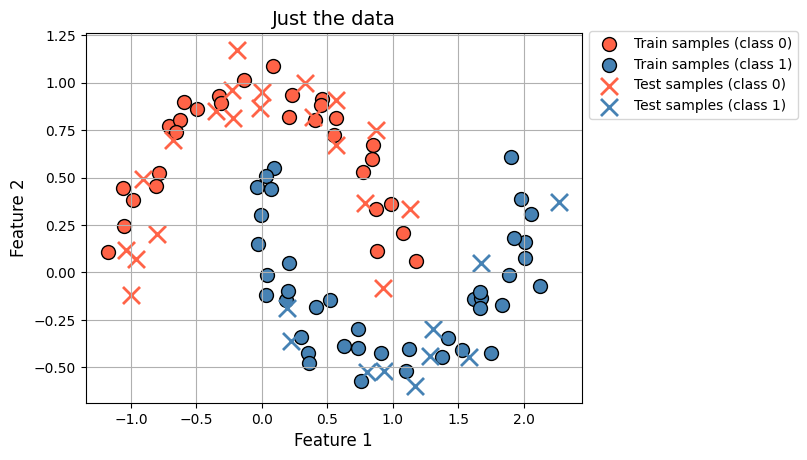

In [8]:
plot_2d_data(X_train, y_train, X_test, y_test, title="Just the data")

## ✨ Model 🤖

### Training

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Evaluate = Test...

#### ...visually

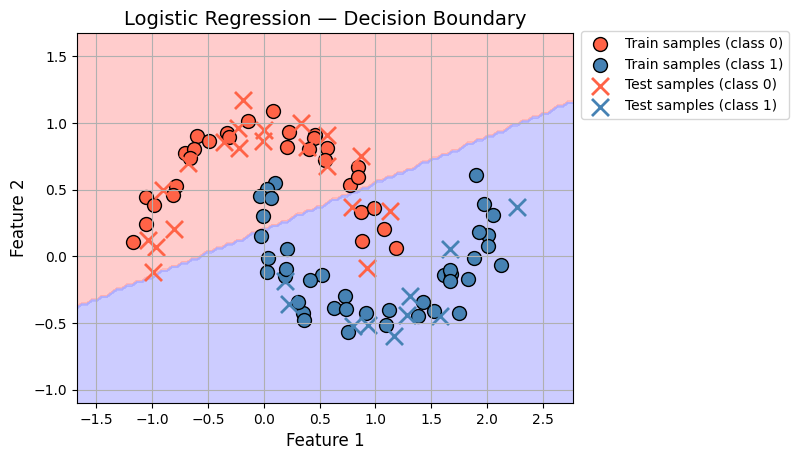

In [10]:
plot_2d_data(X_train, y_train, X_test, y_test, model=model, title="Logistic Regression — Decision Boundary")

#### ...quantitatively

In [11]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_pred, y_test_pred

(array([0, 0, ..., 1, 1], shape=(70,)), array([0, 0, ..., 1, 1], shape=(30,)))

In [12]:
def accuracy(y_pred, y_true):
    print("Accuracy:", (y_pred==y_true).sum() / len(y_pred))

In [13]:
accuracy(y_train_pred, y_train)
accuracy(y_test_pred, y_test)

Accuracy: 0.8571428571428571
Accuracy: 0.9


## 💻 YOUR TURN — Train Your Own Model

1. Pick a model from the list:
    - [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#)
    - [Support Vector Machine (linear)](https://scikit-learn.org/1.6/modules/generated/sklearn.svm.LinearSVC.html#)
    - [Support Vector Classifier (beyond linear)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
    - ...
2. Perform training
3. Visualize the model
4. Evaluate the model using accuracy

---

If you have time you can check out a model comparison from scikit-learn $\rightarrow$ Click to [launch another binder](https://mybinder.org/v2/gh/scikit-learn/scikit-learn/1.6.X?urlpath=lab/tree/notebooks/auto_examples/classification/plot_classifier_comparison.ipynb)

In [14]:
# instantiate and train the model

# visualize the model

# perform predictions

# compute accuracy

### Solution

#### Simple ML pipeline



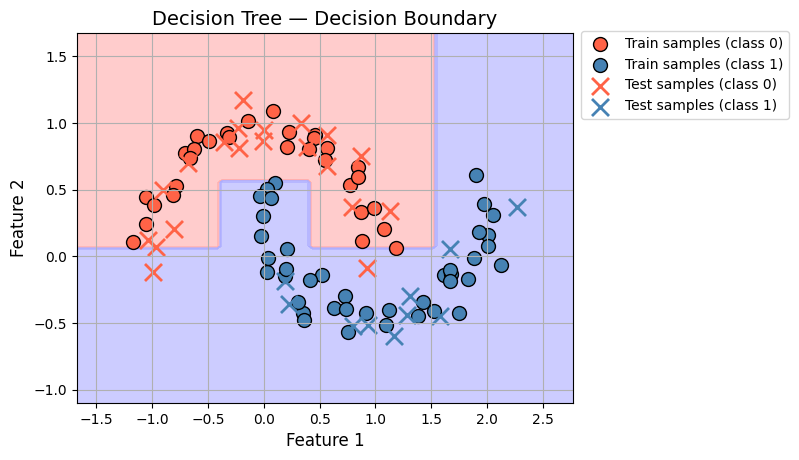

Accuracy: 1.0
Accuracy: 0.9333333333333333


In [15]:
from sklearn.tree import DecisionTreeClassifier

# create basic model instance and train
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# evaluate model visually
plot_2d_data(X_train, y_train, X_test, y_test, model=model, title="Decision Tree — Decision Boundary")

# perform predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# evaluate model quantitatively
accuracy(y_train_pred, y_train)
accuracy(y_test_pred, y_test)

In [16]:
from sklearn.tree import plot_tree

def visualize_decision_tree(model, save_path=None):
    plt.figure(figsize=(8, 10))
    plot_tree(
        model,
        filled=True,
        feature_names=["feature 1", "feature2"],
        class_names=['0', '1'],
        rounded=True,
        fontsize=10
    )
    if save_path:
        plt.savefig(save_path)
    plt.show()

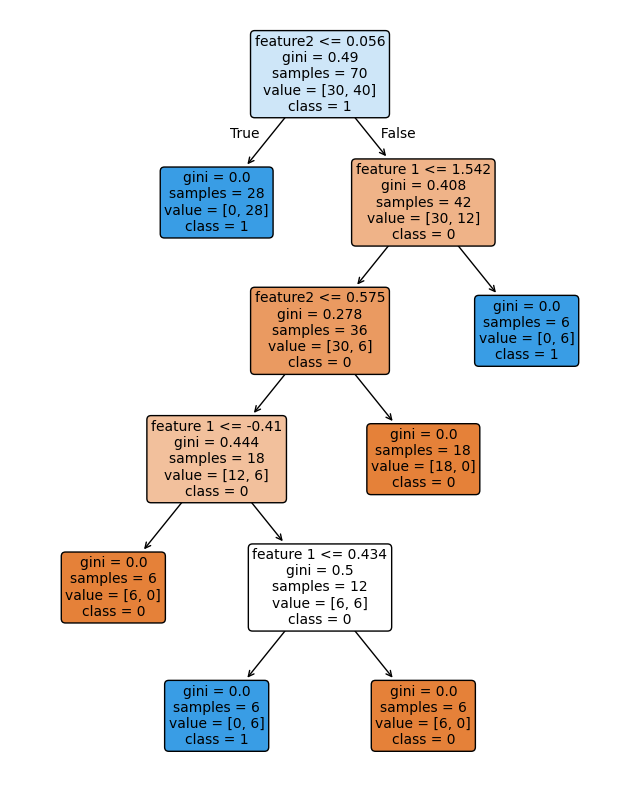

In [17]:
visualize_decision_tree(model)

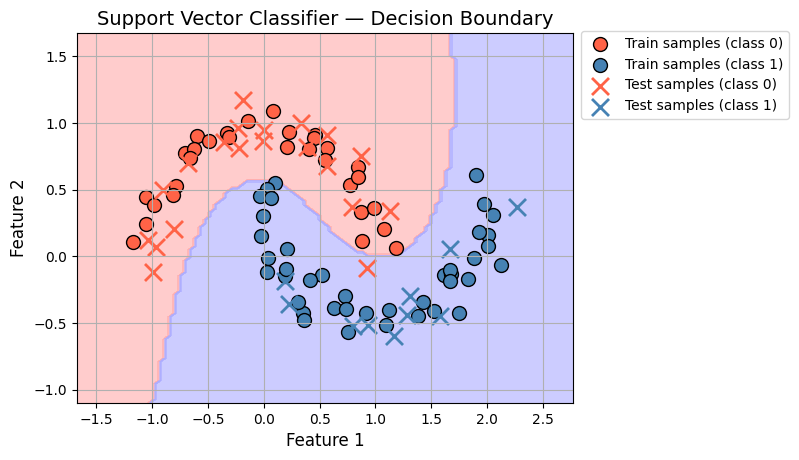

Accuracy: 1.0
Accuracy: 0.9666666666666667


In [18]:
from sklearn.svm import SVC

# create basic model instance and train
model = SVC()
model.fit(X_train, y_train)

# evaluate model visually
plot_2d_data(X_train, y_train, X_test, y_test, model=model, title="Support Vector Classifier — Decision Boundary")

# perform predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# evaluate model quantitatively
accuracy(y_train_pred, y_train)
accuracy(y_test_pred, y_test)

## 🔎 Look under the hood (Mathematical)

### Mathematical Explanation

🧠 How A **Logistic Regression** Model Works

We want a **classifier** that can learn from data — meaning, it can look at examples and figure out how to make good predictions for new data.

To do this, we define a function that takes in a data sample $x$ and transforms it using the equation:

$$
f(x) = w^\top x + b
$$

This is a **linear transformation** (actually **affine**, because of the bias $b$), where:

- $w$ = weights (one per feature)
- $b$ = bias (a constant offset)

These are the so-called **learnable parameters** of the model.  
Learning means the algorithm tries to find the right values for $w$ and $b$ that make the model give good predictions.

---

🎯 What does "good" mean?

In this case, "good" means making predictions that match the true labels $y$.  
But here’s the twist: $f(x)$ can be any real number from $-\infty$ to $+\infty$. That's not helpful when we want a **probability** (a number between $0$ and $1$).

So we apply a **non-linear squashing function** called the **sigmoid** (google it; is the CDF of a gaussian distribution):

$$
\sigma(z) = \frac{1}{1 + \text{exp}(-z)} \in (0, 1)
$$

Putting it together:

$$
\tilde{y} = \sigma(f(x)) = \sigma(w^\top x + b)
$$

Now $\tilde{y}$ (aka `y_pred`) is the predicted probability that the class is $1$.

---

⚙️ How does the model learn?

<u>**TL;DR**</u>

We compare the predicted value `y_pred` with the true label `y_true`, and compute the **loss** using the **binary cross-entropy** (log loss).  
This tells us how "bad" a prediction is.

Then we use **gradient descent** to update the parameters $w$ and $b$ to **minimize the loss**.  
> In the shower, you tweak some knobs to balance hot and cold and water in order to find the right temperature. This is the same here, $w$ and $b$ are the knobs that can be tweaked (search for the best mix) in order to find the model that forms the right results often!

In other words, we take small steps in the direction that makes the model better at predicting.

We repeat this process for many iterations (epochs), and the model gradually learns better parameters.

<u>**Long Version:**</u>

We compare the predicted value $\tilde{y} = \sigma(w^\top x + b)$ with the true label $y$, and compute the **loss** using **binary cross-entropy**:

$$
\mathcal{l}(w, b) = - \left[ y \log(\tilde{y}) + (1 - y) \log(1 - \tilde{y}) \right]
$$

For the whole dataset:

$$
\mathcal{L}(w, b) = \frac{1}{n} \sum_{i=1}^n \mathcal{l}^{(i)} = - \frac{1}{n} \sum_{i=1}^n \left[ y^{(i)} \log(\tilde{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \tilde{y}^{(i)}) \right]
$$

To make $\tilde{y}$ close to $y$, we minimize this loss using **gradient descent**.  
That means we compute the gradients of the loss with respect to the parameters:

- Gradient w.r.t. weights:
  $$
  \frac{\partial \mathcal{L}}{\partial w} = \frac{1}{n} \sum_{i=1}^n (\tilde{y}^{(i)} - y^{(i)}) \cdot x^{(i)}
  $$

- Gradient w.r.t. bias:
  $$
  \frac{\partial \mathcal{L}}{\partial b} = \frac{1}{n} \sum_{i=1}^n (\tilde{y}^{(i)} - y^{(i)})
  $$

We update $w$ and $b$ by taking small steps in the negative gradient direction.  
Repeat this many times, and the model gradually improves (loss is convex on $w$ and $b$).

---

How do we make predictions?

Once training is done, we **keep the learned $w$ and $b$**, and for any new data sample $x$, we just compute:

$$
\tilde{y} = \sigma(w^\top x + b)
$$

If $\tilde{y} \gt 0.5$, we predict class $1$; otherwise, class $0$.

---

🤖 BONUS

Neural networks do the exact same thing — **but instead of just one transformation**, they chain many of them together.  
Each layer applies a function like $f(x) = Wx + b$, followed by a non-linear activation, and the entire network is trained using the same idea: **gradient descent on a loss function**.

So logistic regression is the simplest building block of deep learning.

### Logistic Regression From Scratch

In [19]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MyLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, lr=0.01, max_iter=1000):
        self.lr = lr
        self.max_iter = max_iter
        self.weights = None
        self.bias = None
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iter):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(z)

            # Gradient descent
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))  # gradient of loss wrt. weights vector
            db = (1 / n_samples) * np.sum(y_pred - y)  # derivative of loss wrt. bias scalar

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

        # for sklearn compatibility
        self.coef_ = self.weights
        self.intercept_ = self.bias
        self.classes_ = np.unique(y)
        self.n_features_in_ = X.shape[1]

    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self._sigmoid(z)
    
    def predict(self, X):
        proba = self.predict_proba(X)
        return (proba > 0.5).astype(int)

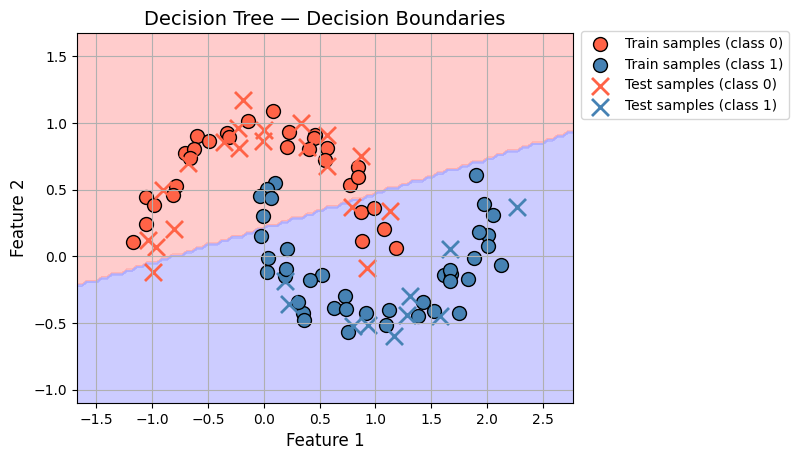

Accuracy: 0.8571428571428571
Accuracy: 0.8666666666666667


In [20]:
model = MyLogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# evaluate model visually
plot_2d_data(X_train, y_train, X_test, y_test, model=model, title="Decision Tree — Decision Boundaries")

# perform predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# evaluate model quantitatively
accuracy(y_train_pred, y_train)
accuracy(y_test_pred, y_test)

## 🛠️ Feature Engineering

**Try a new dataset and see how we perform per default (no feature engineering here)**

In [21]:
X, y = make_circles(  # Or use make_moons(n_samples=100, noise=0.1)
    n_samples=100,
    factor=0.5,
    noise=0.1,
    random_state=42
)

def training_pipeline(*, X, y, model, with_plot: bool = False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    model.fit(X_train, y_train)

    if with_plot:
        # evaluate model visually
        plot_2d_data(X_train, y_train, X_test, y_test, model=model, title="Decision Boundary")
    
    # perform predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate model quantitatively
    print("--- Train ---")
    accuracy(y_train_pred, y_train)
    print("--- Test ---")
    accuracy(y_test_pred, y_test)

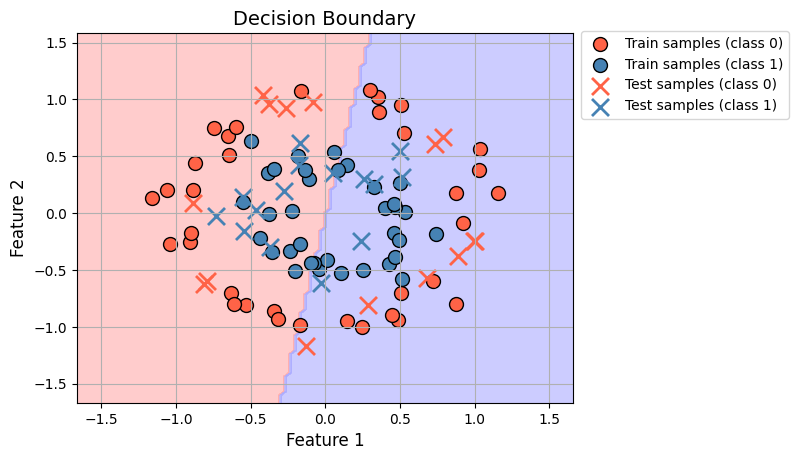

--- Train ---
Accuracy: 0.5142857142857142
--- Test ---
Accuracy: 0.43333333333333335


In [22]:
training_pipeline(X=X, y=y, model=MyLogisticRegression(), with_plot=True)

#### Create New Feature

**Now with feature engineering, i.e. we as humans now think about how the data could be transformed to help out the model**

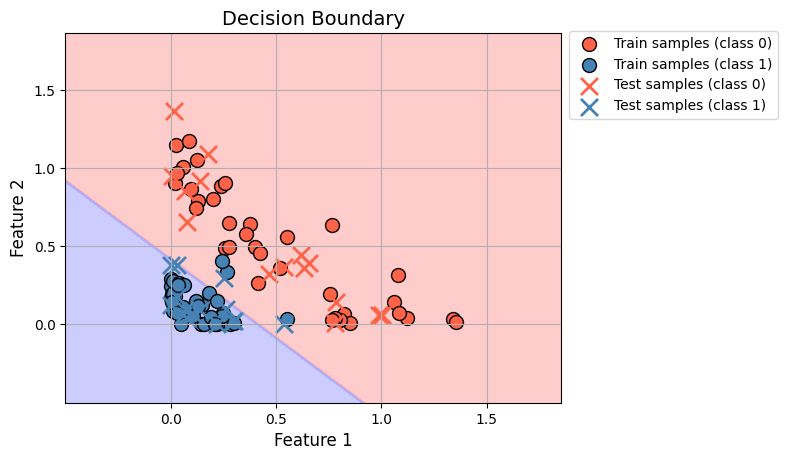

--- Train ---
Accuracy: 0.9571428571428572
--- Test ---
Accuracy: 0.9333333333333333


In [23]:
X_new = X**2  # square everything, the 2D donut data would look a bowl in 3d (X[:, 2] = X[:, 0]**2 + X[:, 1]**2 would be the third feature)
training_pipeline(X=X_new, y=y, model=MyLogisticRegression(), with_plot=True)

#### Scale Features
Manche Modelle sind nicht unabhängig von der Skalierung der Daten  
$\implies$ Skalierung auf $\text{Durschnitt}=\mu=0$ und $\text{Standardabweichung}=\sigma=1$ hilft

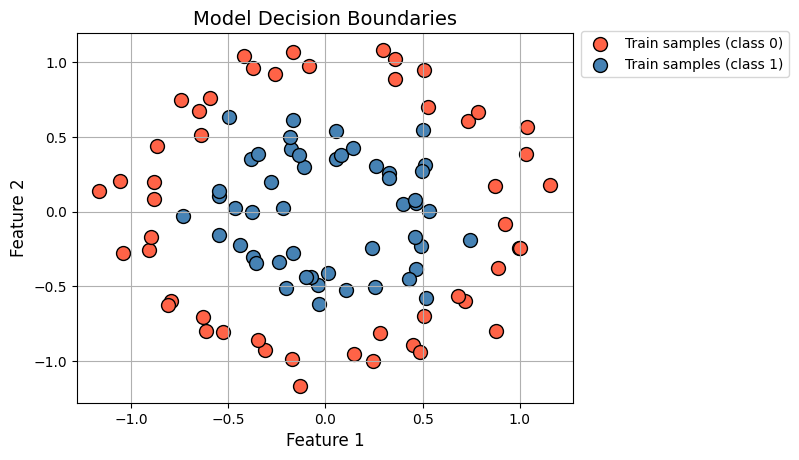

Mittelwert: [ 0.00478926 -0.00396879] 	Standardabweichung [0.56309332 0.56890655]


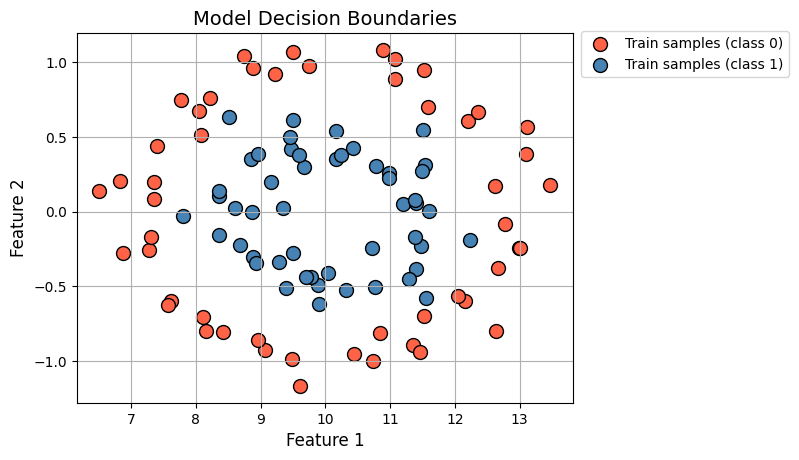

Mittelwert: [ 1.00143678e+01 -3.96879026e-03] 	Standardabweichung [1.68927996 0.56890655]


In [24]:
# lasst uns mal vergleichen (ein Feature in X_new wird jetzt drastisch anders skaliert)
mu = 10
sigma = 3

X_new = X.copy()
X_new[:, 0] = X_new[:, 0] * sigma + mu
plot_2d_data(X, y)
print("Mittelwert:", X.mean(axis=0), "\tStandardabweichung", X.std(axis=0))
plot_2d_data(X_new, y)
print("Mittelwert:", X_new.mean(axis=0), "\tStandardabweichung", X_new.std(axis=0))

**Vergleich von Daten, die keine Skalierung brauchen vs. Daten, die schlecht skaliert sind**

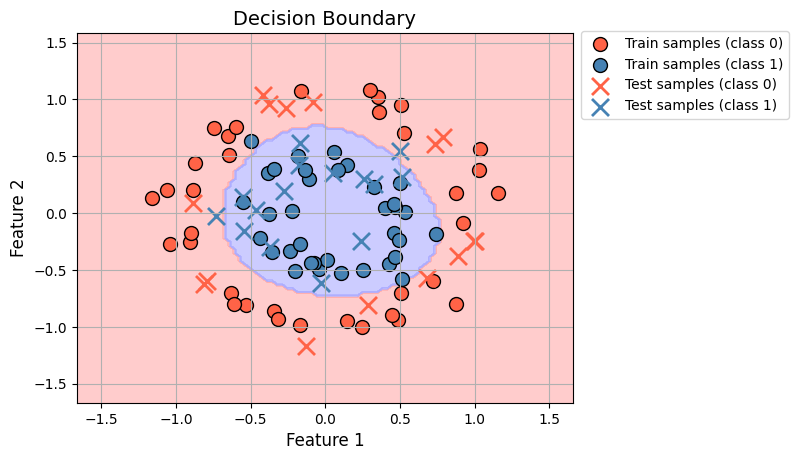

--- Train ---
Accuracy: 0.9857142857142858
--- Test ---
Accuracy: 0.9333333333333333


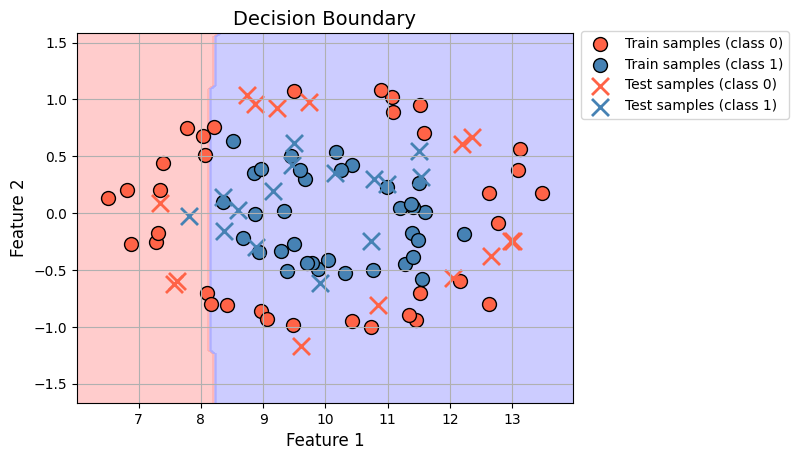

--- Train ---
Accuracy: 0.6571428571428571
--- Test ---
Accuracy: 0.5666666666666667


In [25]:
training_pipeline(X=X, y=y, model=SVC(), with_plot=True)
training_pipeline(X=X_new, y=y, model=SVC(), with_plot=True)

#### 💻 YOUR TURN — Train Your Own Model

Skaliert die Features von `X_new` so, dass sie $\mu=0$ und $\sigma=1$ haben.  
Denkt daran, dass ich die Daten selbst schon mal geändert habe und zwar via
```python
X_new[:, 0] = X_new[:, 0] * sigma + mu.
```
Also erst mal multiplizieren, dann addieren. Um das rückgängig zu machen ist die Operationsreihenfolge also erst mal subtrahieren, dann dividieren. Nutzt aber nicht meine sigma und mu Werte, sondern `mu = X_new.mean(axis=0)` (Durchschnittswert für jedes Feature) und `sigma = X_new.std(axis=0)` (Standardabweichung für jedes Feature).

In [26]:
# Daten skalieren

# Pipeline anwenden
# training_pipeline(X=X_new, y=y, model=SVC(), with_plot=True)

##### Lösung

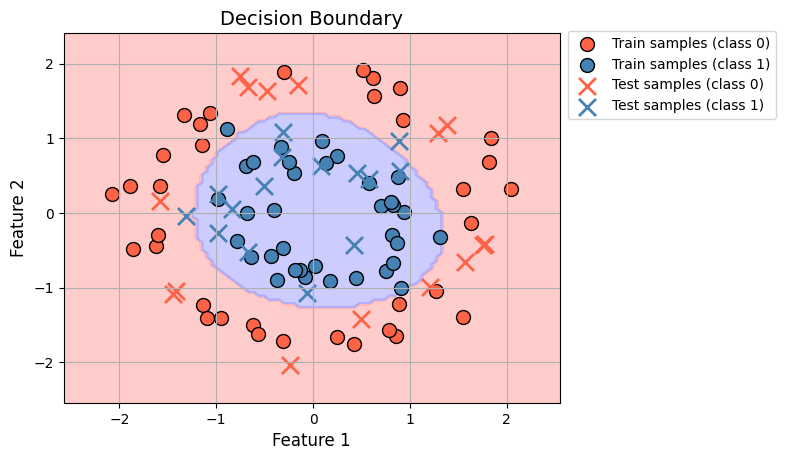

--- Train ---
Accuracy: 0.9857142857142858
--- Test ---
Accuracy: 0.9333333333333333


In [27]:
# Daten skalieren
mu, std = X_new.mean(axis=0), X_new.std(axis=0)
X_new = (X_new - mu) / std

# Pipeline anwenden
training_pipeline(X=X_new, y=y, model=SVC(), with_plot=True)

##### Bessere Lösung

⚠️ Der Skalierer ist Teil des Modells! Das Modell lernt ja die Entscheidungsgrenze für skalierte Daten, d.h. wenn der Nutzer Daten hochlädt und unsere API sie weiterleitet zu unserem Modell, dann müssen sie vorher skaliert werden, also müssten wir uns die Werte für `mu` und `sigma` merken fürs Deployment.

✅ Scikit-Learn hat dafür etwas erstellt, und zwar Pipelines und einen Skalierer mit dem selben Interface wie die Modelle auch

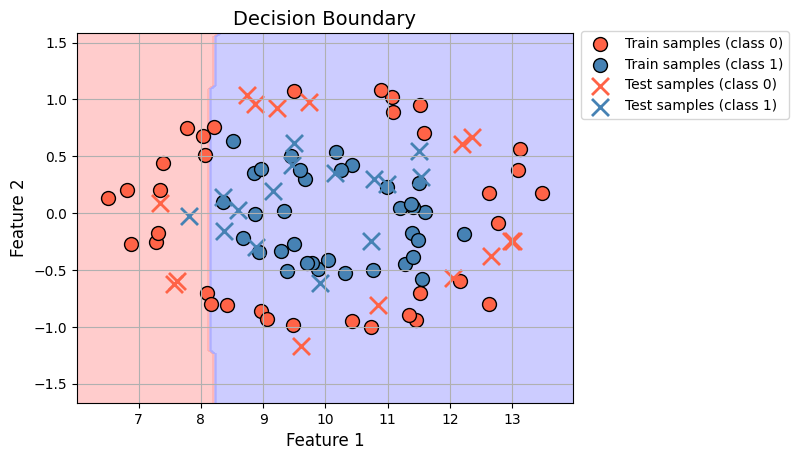

--- Train ---
Accuracy: 0.6571428571428571
--- Test ---
Accuracy: 0.5666666666666667


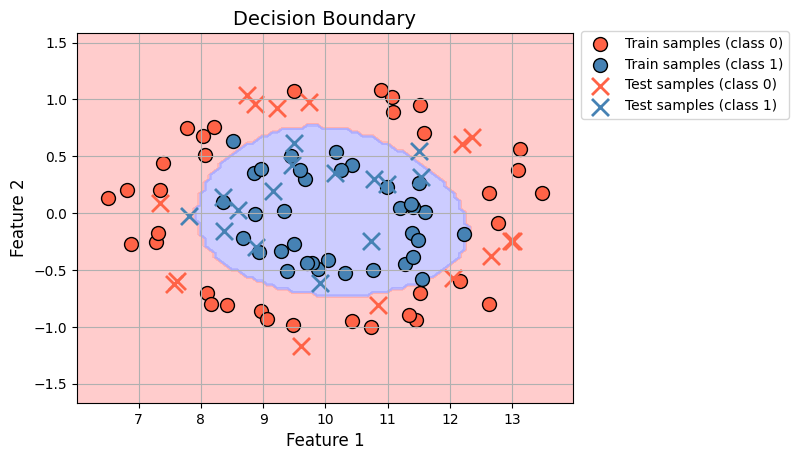

--- Train ---
Accuracy: 0.9857142857142858
--- Test ---
Accuracy: 0.9333333333333333


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Daten wieder schlecht skalieren
X_new = X_new * std + mu

# Pipeline ist quasi wie ein Modell, hat das gleiche Interface, daher nutzt es auch einfach so.
pipeline = Pipeline([
        ('scaler', StandardScaler()),  # StandardScaler übernimmt das Skalieren und merkt sich auch die Werte
        ('classifier', SVC())  # hier könnte jegliches Scikit-learn Modell verwendet werden
    ])
training_pipeline(X=X_new, y=y, model=SVC(), with_plot=True)
training_pipeline(X=X_new, y=y, model=pipeline, with_plot=True)

**Manche Modelle wie der Entscheidungsbaum sind invariant gegenüber Datenskalierung**

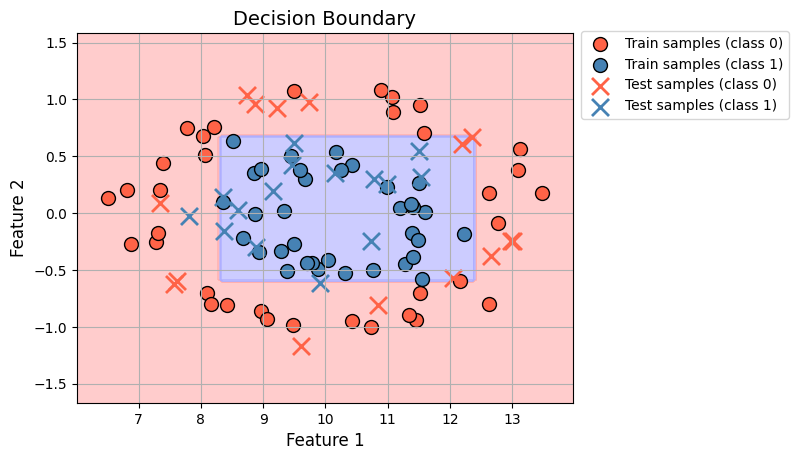

--- Train ---
Accuracy: 1.0
--- Test ---
Accuracy: 0.8333333333333334


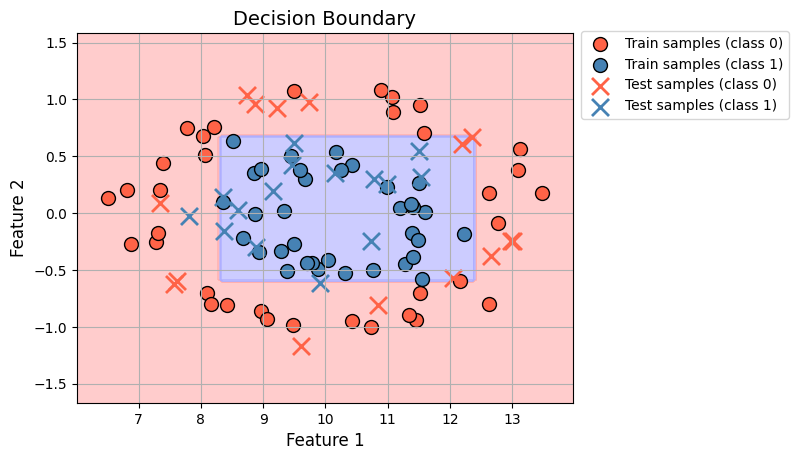

--- Train ---
Accuracy: 1.0
--- Test ---
Accuracy: 0.8333333333333334


In [29]:
pipeline = Pipeline([
        ('scaler', StandardScaler()),  # StandardScaler übernimmt das Skalieren und merkt sich auch die Werte
        ('classifier', DecisionTreeClassifier())  # hier könnte jegliches Scikit-learn Modell verwendet werden
    ])
training_pipeline(X=X_new, y=y, model=DecisionTreeClassifier(), with_plot=True)
training_pipeline(X=X_new, y=y, model=pipeline, with_plot=True)

# Fazit 1

- Daten in Train & Test teilen
- Daten sollten skaliert werden
- Verschiedene Modelle kommen mit verschiedenem Freiheitsgrad. Unter der Motorhaube funktionieren sie verschieden, was die Entscheidungsgrenze angeht, aber sie alle optimieren eine Zielfunktion auf Basis von Feedback durch den Soll-Ist-Abgleich: Was sollte rauskommen (`y_true`) vs. was ist rausgekommen (`y_pred`).

---

**Folgender Codeausschnitt fasst alles Bisherige zusammen:**

```python
pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', DecisionTreeClassifier())
    ])
training_pipeline(X=X, y=y, model=pipeline, with_plot=True)
```

# remove

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# 2. Modelle definieren
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# 3. Pipeline & Training & Evaluation
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f'=== {name} ===')
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()


=== Logistic Regression ===
Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        20
           1       0.71      1.00      0.83        10

    accuracy                           0.87        30
   macro avg       0.86      0.90      0.86        30
weighted avg       0.90      0.87      0.87        30


=== Random Forest ===
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30


=== SVM ===
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.91      1.00      0.95        10

    accuracy                   

# Example 2

## 📊 Dataset

In [32]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [33]:
from sklearn.datasets import load_iris

iris_dict = load_iris(return_X_y=False, as_frame=True)
df = iris_dict["frame"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [34]:
df.value_counts("target")

target
0    50
1    50
2    50
Name: count, dtype: int64

In [35]:
X = iris_dict["data"].values
y = iris_dict["target"].values
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        ...,
        [6.2, 3.4, 5.4, 2.3],
        [5.9, 3. , 5.1, 1.8]], shape=(150, 4)),
 array([0, 0, ..., 2, 2], shape=(150,)))

### Split: Train vs. Test

Auch mit mehr als 2 Features und mehr als 2 Klassen bleibt das Splitting gleich!

In [36]:
# mit stratify=y werden Daten so geteilt, dass jede Klasse gleich oft vorkommt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_train, X_test, y_train, y_test

(array([[5.1, 2.5, 3. , 1.1],
        [6.2, 2.2, 4.5, 1.5],
        ...,
        [5.6, 2.7, 4.2, 1.3],
        [4.6, 3.1, 1.5, 0.2]], shape=(105, 4)),
 array([[7.3, 2.9, 6.3, 1.8],
        [6.1, 2.9, 4.7, 1.4],
        ...,
        [6.5, 3. , 5.2, 2. ],
        [6.6, 2.9, 4.6, 1.3]], shape=(45, 4)),
 array([1, 1, ..., 1, 0], shape=(105,)),
 array([2, 1, ..., 2, 1], shape=(45,)))

### ⚠️ Show Plot?

We cannot really plot the data well anymore, as there are too many dimensions. We could try to apply some dimensionality reduction or play around with using colors and shapes as additional dimensions on top of the cartesian axes, **but you get the point: more dimensions $\implies$ harder to visualize.**

We can also perform some exploratory data analysis here, check distributions per feature, check correlations between features, etc. but we are not interested in that right now.

**Instead, let's see how we can now apply machine learning to find the best model to this problem**

## ✨ Model 🤖

### Training

funktioniert immer noch mit dem gleichen Workflow (bis aufs fehlende Modell-Plot)

In [37]:
from sklearn.svm import SVC

# create basic model instance and train
model = SVC()
model.fit(X_train, y_train)

SVC()

### Evaluate = Test...

#### ...visually

Ohne spezielle Tricks wie Dimensionsreduktion o.Ä. haben wir zu viele Dimensionen, um sie anschaulich zu visualisieren $\implies$ Wir arbeiten nur noch mit Zahlen!

In [38]:
try:
    # evaluate model visually
    plot_2d_data(X_train, y_train, X_test, y_test, model=model, title="Support Vector Classifier — Decision Boundary")
except Exception as e:
    print("Error:", e)

Error: n_features must be equal to 2. Got 4 instead.


#### ...quantitavely

In [39]:
# perform predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# evaluate model quantitatively
accuracy(y_train_pred, y_train)
accuracy(y_test_pred, y_test)

Accuracy: 0.9714285714285714
Accuracy: 0.9555555555555556


# Regression
Jetzt trennen wir Datenpunkte nicht mehr voneinander, um zu klassifizieren (Gruppen zuzuordnen), sondern wir wollen eine Linie malen, die sich der *echten* Linie anschmiegt, z.B. den Preis von etwas ($y$) basierend auf anderen Infos (Features $X$) einschätzt.

In [45]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(as_frame=True, return_X_y=True)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [50]:
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = SVR()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print(((y_train - y_train_pred)**2).mean())
print(((y_test - y_test_pred)**2).mean())

1.3780026280249338
1.3489971413208721
